In [1]:
import tensorflow as tf
import tensorflow.keras as k
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_moons_dataset

### PLot functions

In [2]:
def plot_scatter(X:np.ndarray, Y:np.ndarray):
    '''
    Show the scatter plot of flower dataset
    
    Parameters
    ----------
    X : numpy.ndarray [shape: (#features, #samples)]
        matrix of data; dtype: float64
    Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1; dtype: uint8 
    '''
    scatter=plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    # plt.show()
    

def plot_decision_boundary(predict, X, Y):
    """
    Plot the decision boundary for logistic regression
    
    Parameters
    ----------
    predict : function
        predicted output; dtype=int8 
    parameters : dict
    X : numpy.ndarray [shape: (#features, #samples)]
        matrix of data; dtype: float64
    Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1; dtype: uint8
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    # Y = None argument is dumpy as not used when print_accuracy=False
    Z = predict(tf.constant(np.c_[xx.ravel(), yy.ravel()],dtype=tf.float32))
    Z=tf.cast(Z > 0.5, "float32")
    Z = Z.numpy().reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plot_scatter(X,Y)

### Import data

(500, 2) (500, 1)


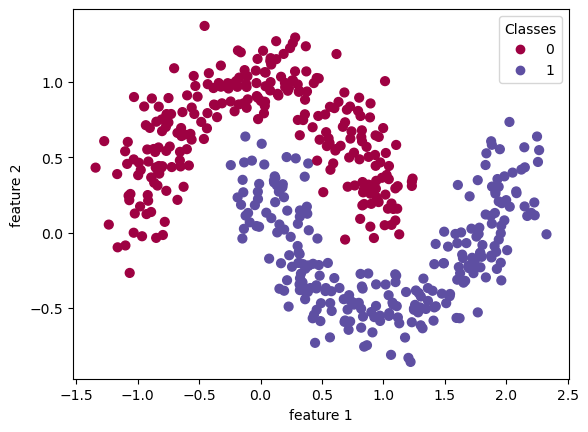

In [3]:
X_np,Y_np = load_moons_dataset(n_samples=500, noise=0.15)
X=tf.constant(X_np.T, dtype=tf.float32)
Y=tf.constant(Y_np.reshape(-1,1), dtype=tf.float32)
print(X.shape, Y.shape)
plot_scatter(X_np,Y_np)

### L Layer Neural Network Model

In [4]:
def L_layer_model(train_X, train_Y, layers_dims, learning_rate=0.0075, num_epochs=2000, activation_L_1="relu", activation_L="sigmoid", print_cost=False):
    """
    L layer neural network with different activation function on output layer option.
    
    Parameters
    ----------
    train_X : Tensor [shape: (#samples, #features)]; dtype=tf.float32
    train_Y : Tensor [shape: (#samples, 1)]; dtype=tf.float32
    layers_dims : list of int; list of number of nodes in each layer

    Returns
    -------
    forward : trained model
    costs : list of cost every 100 iteration
    """
    costs = []                                        # To keep track of the cost
    L = len(layers_dims) # number of layers in the network

    ## Initialize model
    forward = k.models.Sequential()
    np.random.seed(3)
    # layers initialized; [1:L-1] X activation_L_1 + [L] X activation_L
    for l in range(1, L-1):
        init_W = (np.random.randn(layers_dims[l], layers_dims[l-1]) / np.sqrt(layers_dims[l-1])).T.astype(np.float32)
        forward.add( k.layers.Dense(units=layers_dims[l], activation=activation_L_1, input_shape=(layers_dims[l-1],),
                                    kernel_initializer=tf.constant_initializer(init_W),
                                    bias_initializer="zeros") )
        #  kernel_initializer=k.initializers.RandomNormal(mean=0.0, stddev=1.0,seed=3)
    init_W = (np.random.randn(layers_dims[-1], layers_dims[-2]) / np.sqrt(layers_dims[-2])).T.astype(np.float32)
    forward.add( k.layers.Dense(units=layers_dims[-1], activation=activation_L, input_shape=(layers_dims[-2],),
                                kernel_initializer=tf.constant_initializer(init_W),
                                bias_initializer="zeros") )
    # forward.summary()

    ## Initialize build-in classes
    bce = tf.keras.losses.BinaryCrossentropy( from_logits=False, reduction='sum')
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    ## epochs loop
    for i in range(num_epochs): 
        ## forward pass
        with tf.GradientTape() as tape:
            train_Y_pred = forward(train_X)       # (209,n_L)=(m,n_L)
            cost = bce(tf.transpose(train_Y), tf.transpose(train_Y_pred))

        ## backward pass
        grads = tape.gradient(cost, forward.trainable_weights)
        optimizer.apply_gradients(zip(grads, forward.trainable_weights))

        ## Record the cost every 100 iterations
        if i % 100 == 0 or i == num_epochs-1:
            costs.append(cost.numpy().item())
            if print_cost:
                print(f"Cost in epochs {i+1}, {cost.numpy().item()}")
    
    return forward, costs


def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

### Detailed info, plots demo

Cost in epochs 1, 0.5394197106361389
Cost in epochs 101, 0.2674639821052551
Cost in epochs 201, 0.15654361248016357
Cost in epochs 301, 0.06698182225227356
Cost in epochs 401, 0.03818527236580849
Cost in epochs 501, 0.026959426701068878
Cost in epochs 601, 0.0212717205286026
Cost in epochs 701, 0.01779010333120823
Cost in epochs 801, 0.015284025110304356
Cost in epochs 901, 0.013162887655198574
Cost in epochs 1001, 0.011121843010187149
Cost in epochs 1101, 0.009662925265729427
Cost in epochs 1201, 0.008480955846607685
Cost in epochs 1301, 0.007506262511014938
Cost in epochs 1401, 0.006687561050057411
Cost in epochs 1501, 0.006011088844388723
Cost in epochs 1601, 0.0054406169801950455
Cost in epochs 1701, 0.004955509677529335
Cost in epochs 1801, 0.004522107075899839
Cost in epochs 1901, 0.004138322081416845
Cost in epochs 2000, 0.003806767053902149
train accuracy: 100.0 %


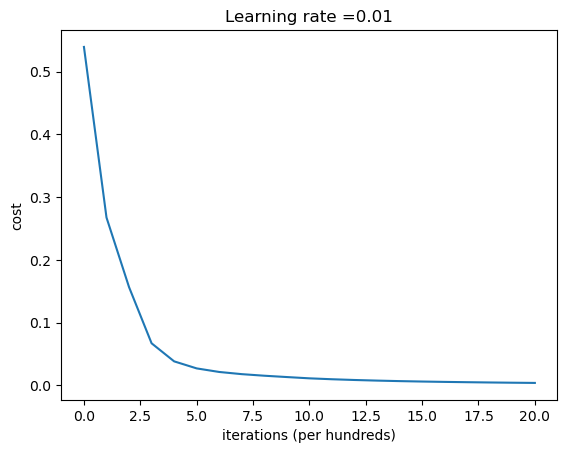

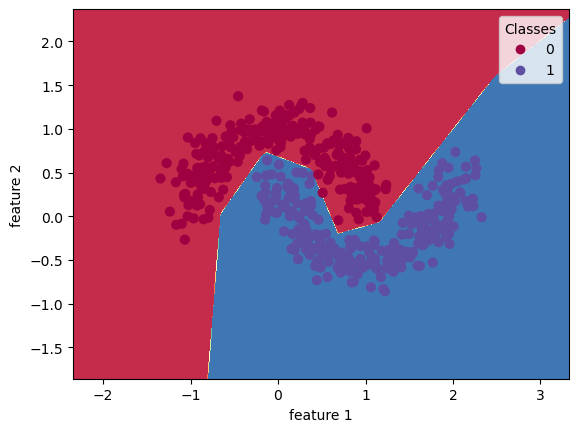

In [5]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],6, 1]

forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=True)
Y_pred=forward(X)
acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
print(f"train accuracy: { acc.numpy().item() *100 } %")
plot_costs(costs, learning_rate)
plot_decision_boundary(forward, X_np, Y_np)

### Single Neuron Model Run

Cost in epochs 1, 0.6124512553215027
Cost in epochs 101, 0.43648403882980347
Cost in epochs 201, 0.37745776772499084
Cost in epochs 301, 0.3387922942638397
Cost in epochs 401, 0.3134258985519409
Cost in epochs 501, 0.2967458963394165
Cost in epochs 601, 0.2855888605117798
Cost in epochs 701, 0.2779872417449951
Cost in epochs 801, 0.272726446390152
Cost in epochs 901, 0.2690425217151642
Cost in epochs 1001, 0.2664421796798706
Cost in epochs 1101, 0.2645985782146454
Cost in epochs 1201, 0.2632898986339569
Cost in epochs 1301, 0.26236239075660706
Cost in epochs 1401, 0.2617078721523285
Cost in epochs 1501, 0.2612490952014923
Cost in epochs 1601, 0.2609303593635559
Cost in epochs 1701, 0.2607114017009735
Cost in epochs 1801, 0.2605629861354828
Cost in epochs 1901, 0.2604639232158661
Cost in epochs 2000, 0.2603995203971863
train accuracy: 86.40000224113464 %


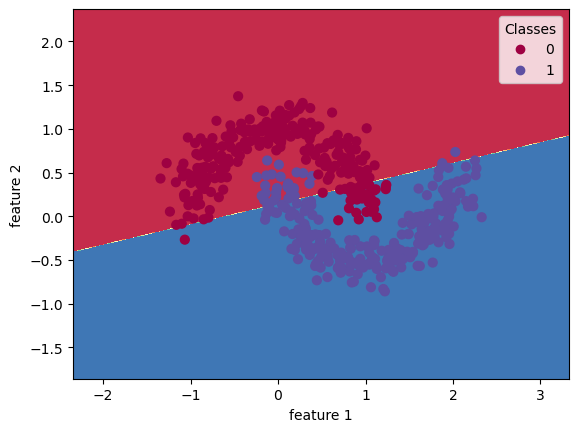

In [6]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1], 1]

forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=True)
Y_pred=forward(X)
acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
print(f"train accuracy: { acc.numpy().item() *100 } %")
plot_decision_boundary(forward, X_np, Y_np)

### 2 Layers (or 1 hidden layer) Neural Network with 1 neuron in output layer

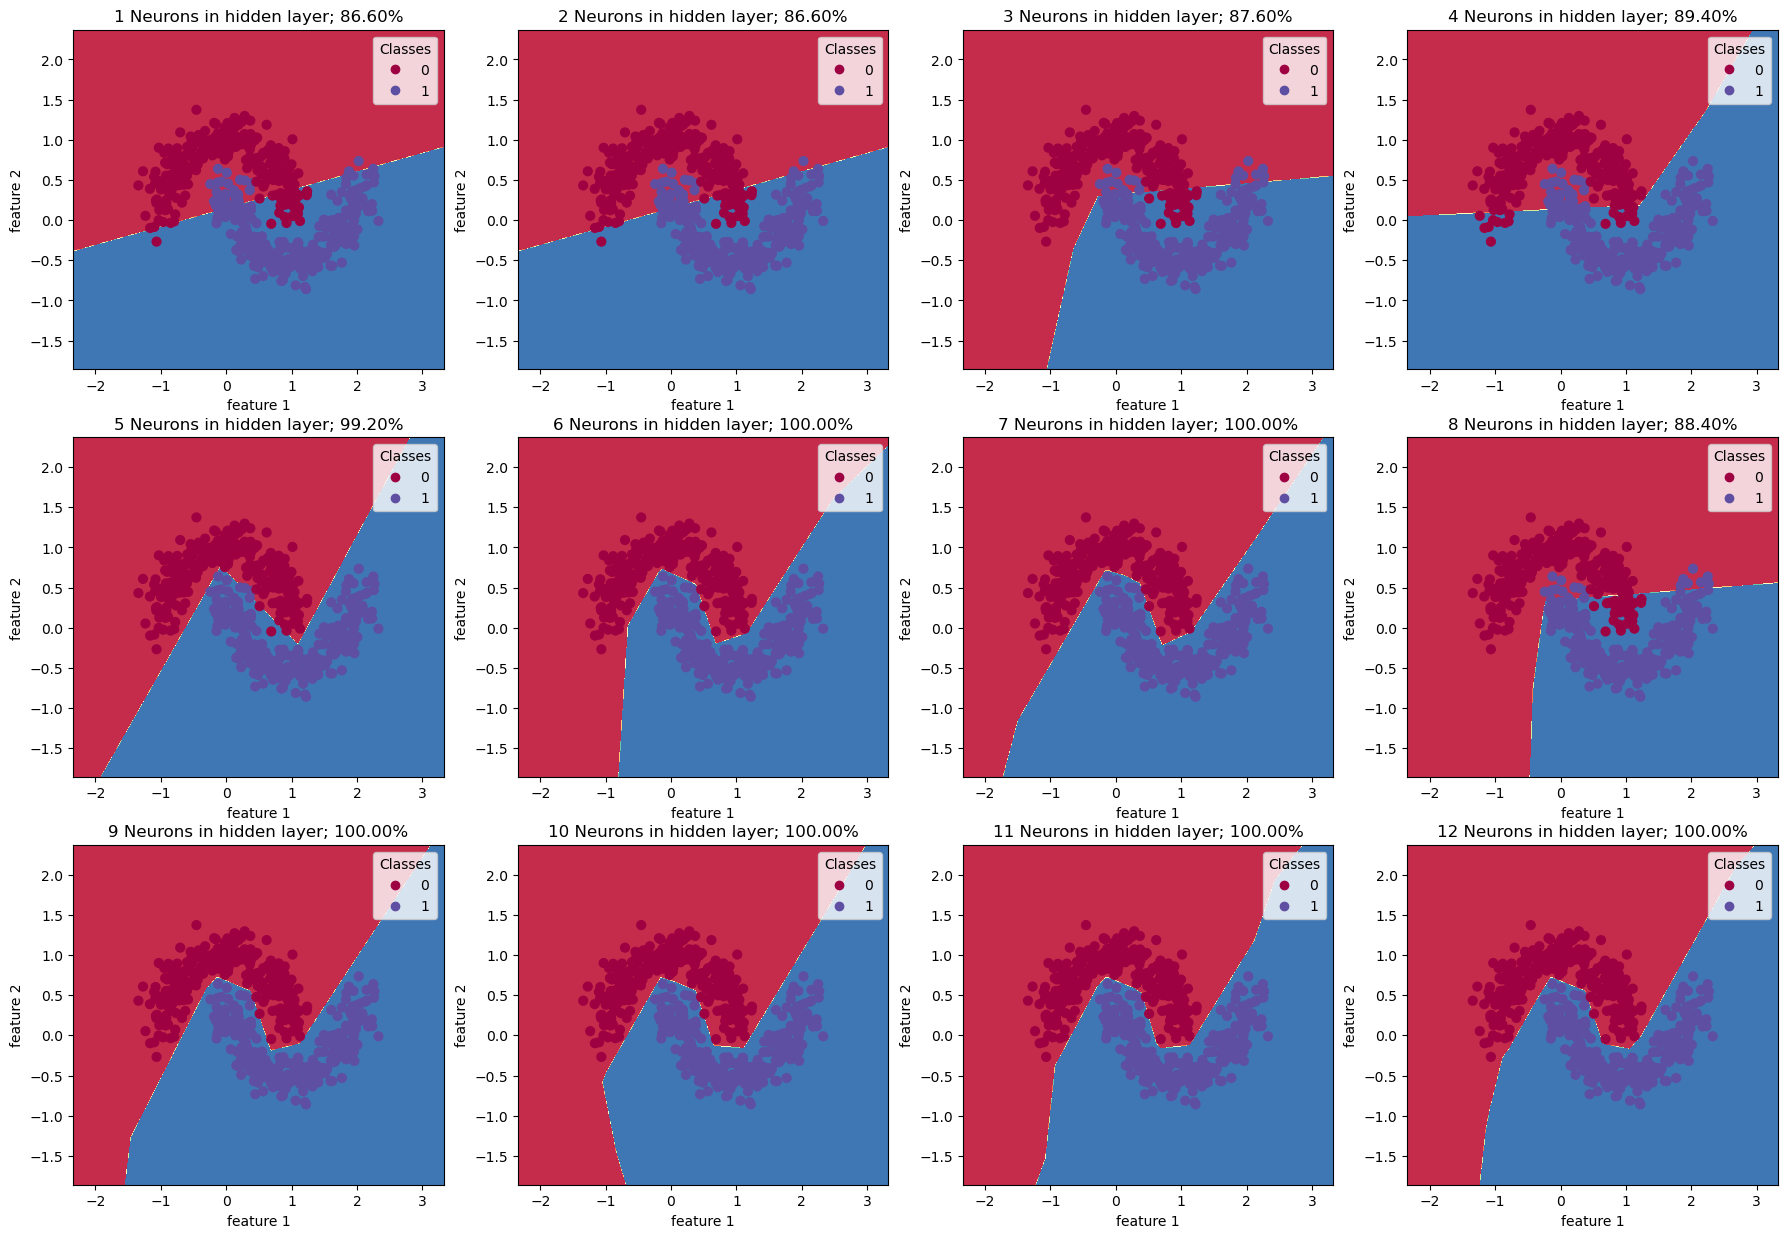

In [7]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],1, 1]
plt.rcParams['figure.figsize'] = (22.0, 15.0) # width, height
for i in range(1,13):
    layers_dims=[X.shape[-1],i, 1]
    plt.subplot(3, 4, i)
    forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
    Y_pred=forward(X)
    acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
    plot_decision_boundary(forward, X_np, Y_np)
    plt.title(f"{i} Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")


### 3 Layers (or 2 hidden layer) Neural Network with 1 neuron in output layer

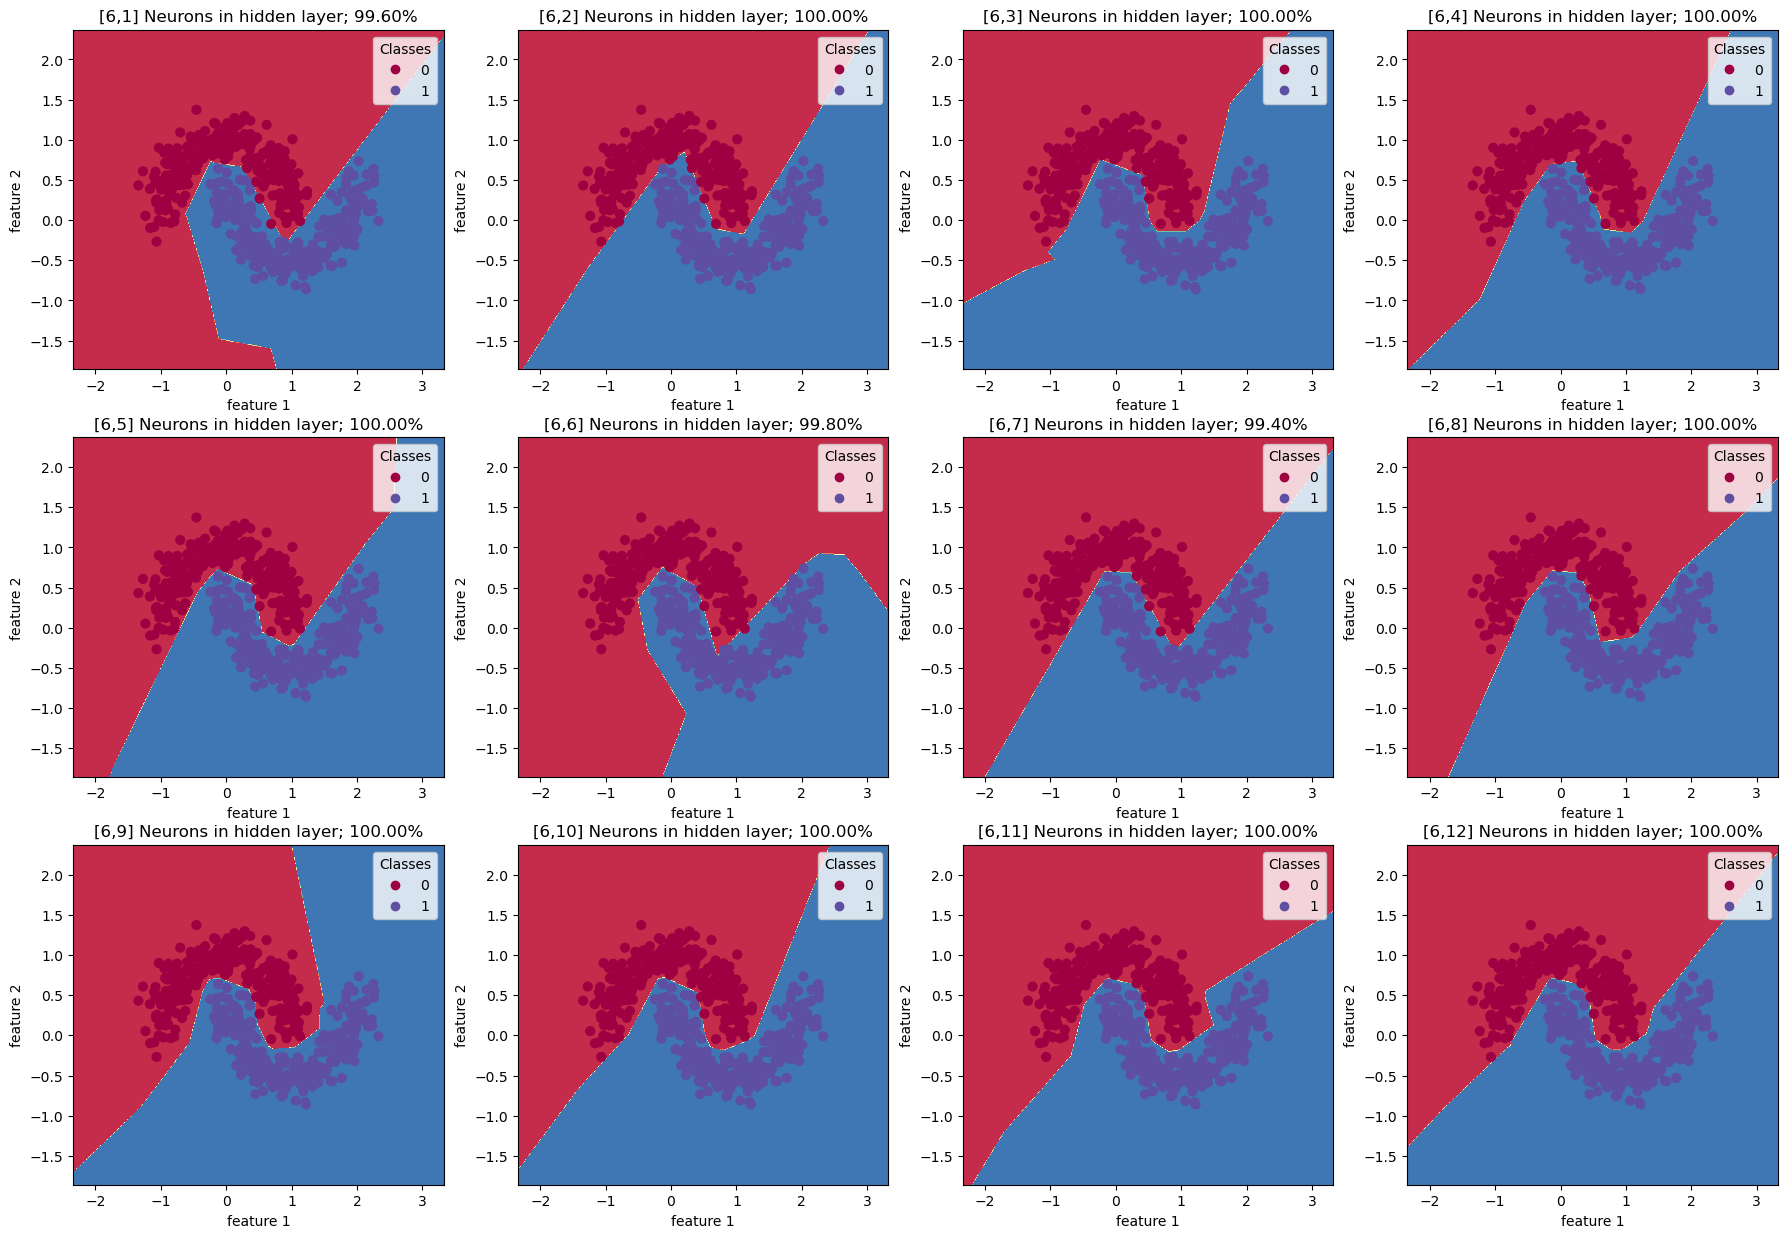

In [8]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],6,1, 1]
plt.rcParams['figure.figsize'] = (22.0, 15.0) # width, height
for i in range(1,13):
    layers_dims=[X.shape[-1],6, i, 1]
    plt.subplot(3, 4, i)
    forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
    Y_pred=forward(X)
    acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
    plot_decision_boundary(forward, X_np, Y_np)
    plt.title(f"[6,{i}] Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")

### Conclusion

2 layer neural networks in general give best results and adding more layers is increasing accuracy by much but probably overfitting.

Text(0.5, 1.0, '[6] Neurons in hidden layer; 100.00%')

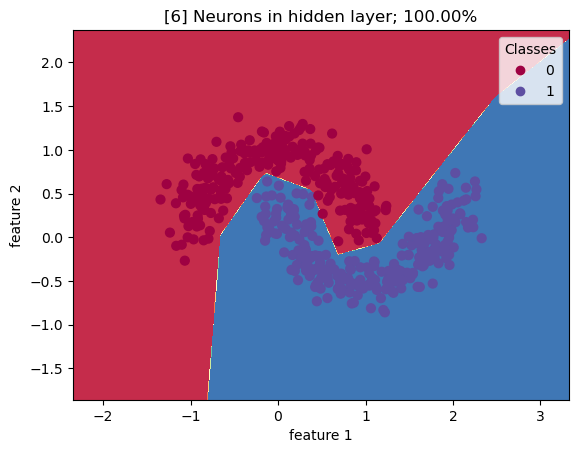

In [9]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],6, 1]
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
Y_pred=forward(X)
acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
# print(f"train accuracy: { acc.item() *100 } %")
# plot_costs(costs, learning_rate)
plot_decision_boundary(forward, X_np, Y_np)
plt.title(f"[6] Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")